In [1]:
import os
datadir = 'adsb_data/20181209_jfk6h'
os.chdir(datadir)


In [2]:

import json
import pprint
import codecs
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


pp = pprint.PrettyPrinter(indent=2)
files = os.listdir('.')

In [3]:
class flight:
    def __init__(self, id):
        self.id = id
        self.lats = list()
        self.longs = list()
        self.time = list()
        # self.gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lats, longs))


def pf(fname):
    with codecs.open(fname, 'r', encoding='utf-8', errors='ignore') as rf:
        sf = rf.readline()
    fdata = json.loads(sf)
    return fdata
    
    
      

In [11]:
ftable = dict() # std::unordered_map<int, flight>

for fname in files[0:100]:
    f1data = pf(fname)
    for fobj in f1data['acList']:
        if fobj['Id'] not in ftable:
            ftable[fobj['Id']] = flight(fobj['Id'])
        ftable[fobj['Id']].lats.append(fobj['Lat'])
        print(type(fobj['Lat']))
        
        ftable[fobj['Id']].longs.append(fobj['Long'])
        ftable[fobj['Id']].time.append(fobj['PosTime'])
        break

    



<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

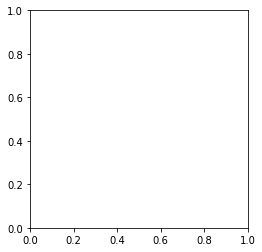

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
colors = ['red', 'green', 'blue', 'black', 'yellow', 'pink']

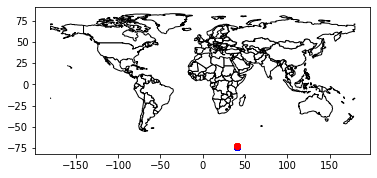

In [10]:
ax = world.plot(color = 'white', edgecolor='black')

i = 0
for _, v in ftable.items():
    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(v.lats[:100], v.longs[:100]))
    gdf.plot(ax=ax, color=colors[v.id % len(colors)])
    if i >= 100:
        break
    i += 1

plt.show()